<h1 align=center> Proceso de EDA</h1>

In [1]:
# Importacion de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ubicaciones de los archivos 
siniestros_data = pd.read_csv('Database/Data_siniestros.csv') 

In [3]:
# Chequeo de la informacion del dataframe
siniestros_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               716 non-null    object 
 1   Num_Victimas     716 non-null    int64  
 2   Fecha            716 non-null    object 
 3   Año              716 non-null    int64  
 4   Mes              716 non-null    int64  
 5   Dia              716 non-null    int64  
 6   Hora_Exacta      716 non-null    object 
 7   Hora             716 non-null    object 
 8   Lugar_del_hecho  716 non-null    object 
 9   Tipo_calle       716 non-null    object 
 10  Calle            716 non-null    object 
 11  Direccion        716 non-null    object 
 12  Comuna           716 non-null    int64  
 13  pos x            716 non-null    object 
 14  pos y            716 non-null    object 
 15  Participantes    716 non-null    object 
 16  Victima          716 non-null    object 
 17  Acusado         

In [4]:
# Observacion de TODOS los nombres de las columnas
siniestros_data.columns

Index(['Id', 'Num_Victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Hora_Exacta',
       'Hora', 'Lugar_del_hecho', 'Tipo_calle', 'Calle', 'Direccion', 'Comuna',
       'pos x', 'pos y', 'Participantes', 'Victima', 'Acusado', 'Rol', 'Sexo',
       'Edad', 'Rango_etario', 'Dia_nombre'],
      dtype='object')

In [5]:
# Observacion de TODOS los tipos de las columnas
siniestros_data.dtypes

Id                  object
Num_Victimas         int64
Fecha               object
Año                  int64
Mes                  int64
Dia                  int64
Hora_Exacta         object
Hora                object
Lugar_del_hecho     object
Tipo_calle          object
Calle               object
Direccion           object
Comuna               int64
pos x               object
pos y               object
Participantes       object
Victima             object
Acusado             object
Rol                 object
Sexo                object
Edad               float64
Rango_etario        object
Dia_nombre          object
dtype: object

In [6]:
# Conversion de columnas de tipo object a category
siniestros_data[['Tipo_calle', 'Comuna', 'Victima', 'Acusado', 'Rol', 'Sexo', 'Rango_etario', 'Dia_nombre']] = siniestros_data[['Tipo_calle', 'Comuna', 'Victima', 'Acusado', 'Rol', 'Sexo', 'Rango_etario', 'Dia_nombre']] .astype('category')

In [7]:
siniestros_data ["Hora"] = pd.to_numeric(siniestros_data["Hora"], errors="coerce")
siniestros_data ["Hora"] = siniestros_data["Hora"].astype("Int64")

In [8]:
# Conversion de columna Fecha a datetime para mejor analisis
siniestros_data['Fecha'] = pd.to_datetime(siniestros_data['Fecha'], format='%Y-%m-%d')


<h2> Analisis de duplicados y nulos </h2>

In [9]:
# Precensia de elementos duplicados
siniestros_data.duplicated().sum()

0

In [10]:
# Precensia de elementos nulos
siniestros_data.isna().sum().sort_values(ascending = False)

Rango_etario       52
Edad               52
Hora                1
Id                  0
Comuna              0
Sexo                0
Rol                 0
Acusado             0
Victima             0
Participantes       0
pos y               0
pos x               0
Direccion           0
Num_Victimas        0
Calle               0
Tipo_calle          0
Lugar_del_hecho     0
Hora_Exacta         0
Dia                 0
Mes                 0
Año                 0
Fecha               0
Dia_nombre          0
dtype: int64

<h2>VARIABLES NUMÉRICAS</h2>

In [11]:
siniestros_data.describe(include=[np.number])

,Num_Victimas,Año,Mes,Dia,Hora,Edad
count,716.000000,716.000000,716.000000,716.000000,715.0,664.000000
mean,1.061453,2018.177374,6.682961,15.951117,11.542657,42.167169
std,0.257193,1.671846,3.573999,8.680602,6.697281,19.788034
min,1.000000,2016.000000,1.000000,1.000000,0.0,1.000000
25%,1.000000,2017.000000,4.000000,9.000000,6.0,27.000000
50%,1.000000,2018.000000,7.000000,16.000000,11.0,37.000000
75%,1.000000,2019.000000,10.000000,23.000000,17.0,56.250000
max,3.000000,2021.000000,12.000000,31.000000,23.0,95.000000


<function matplotlib.pyplot.show(close=None, block=None)>

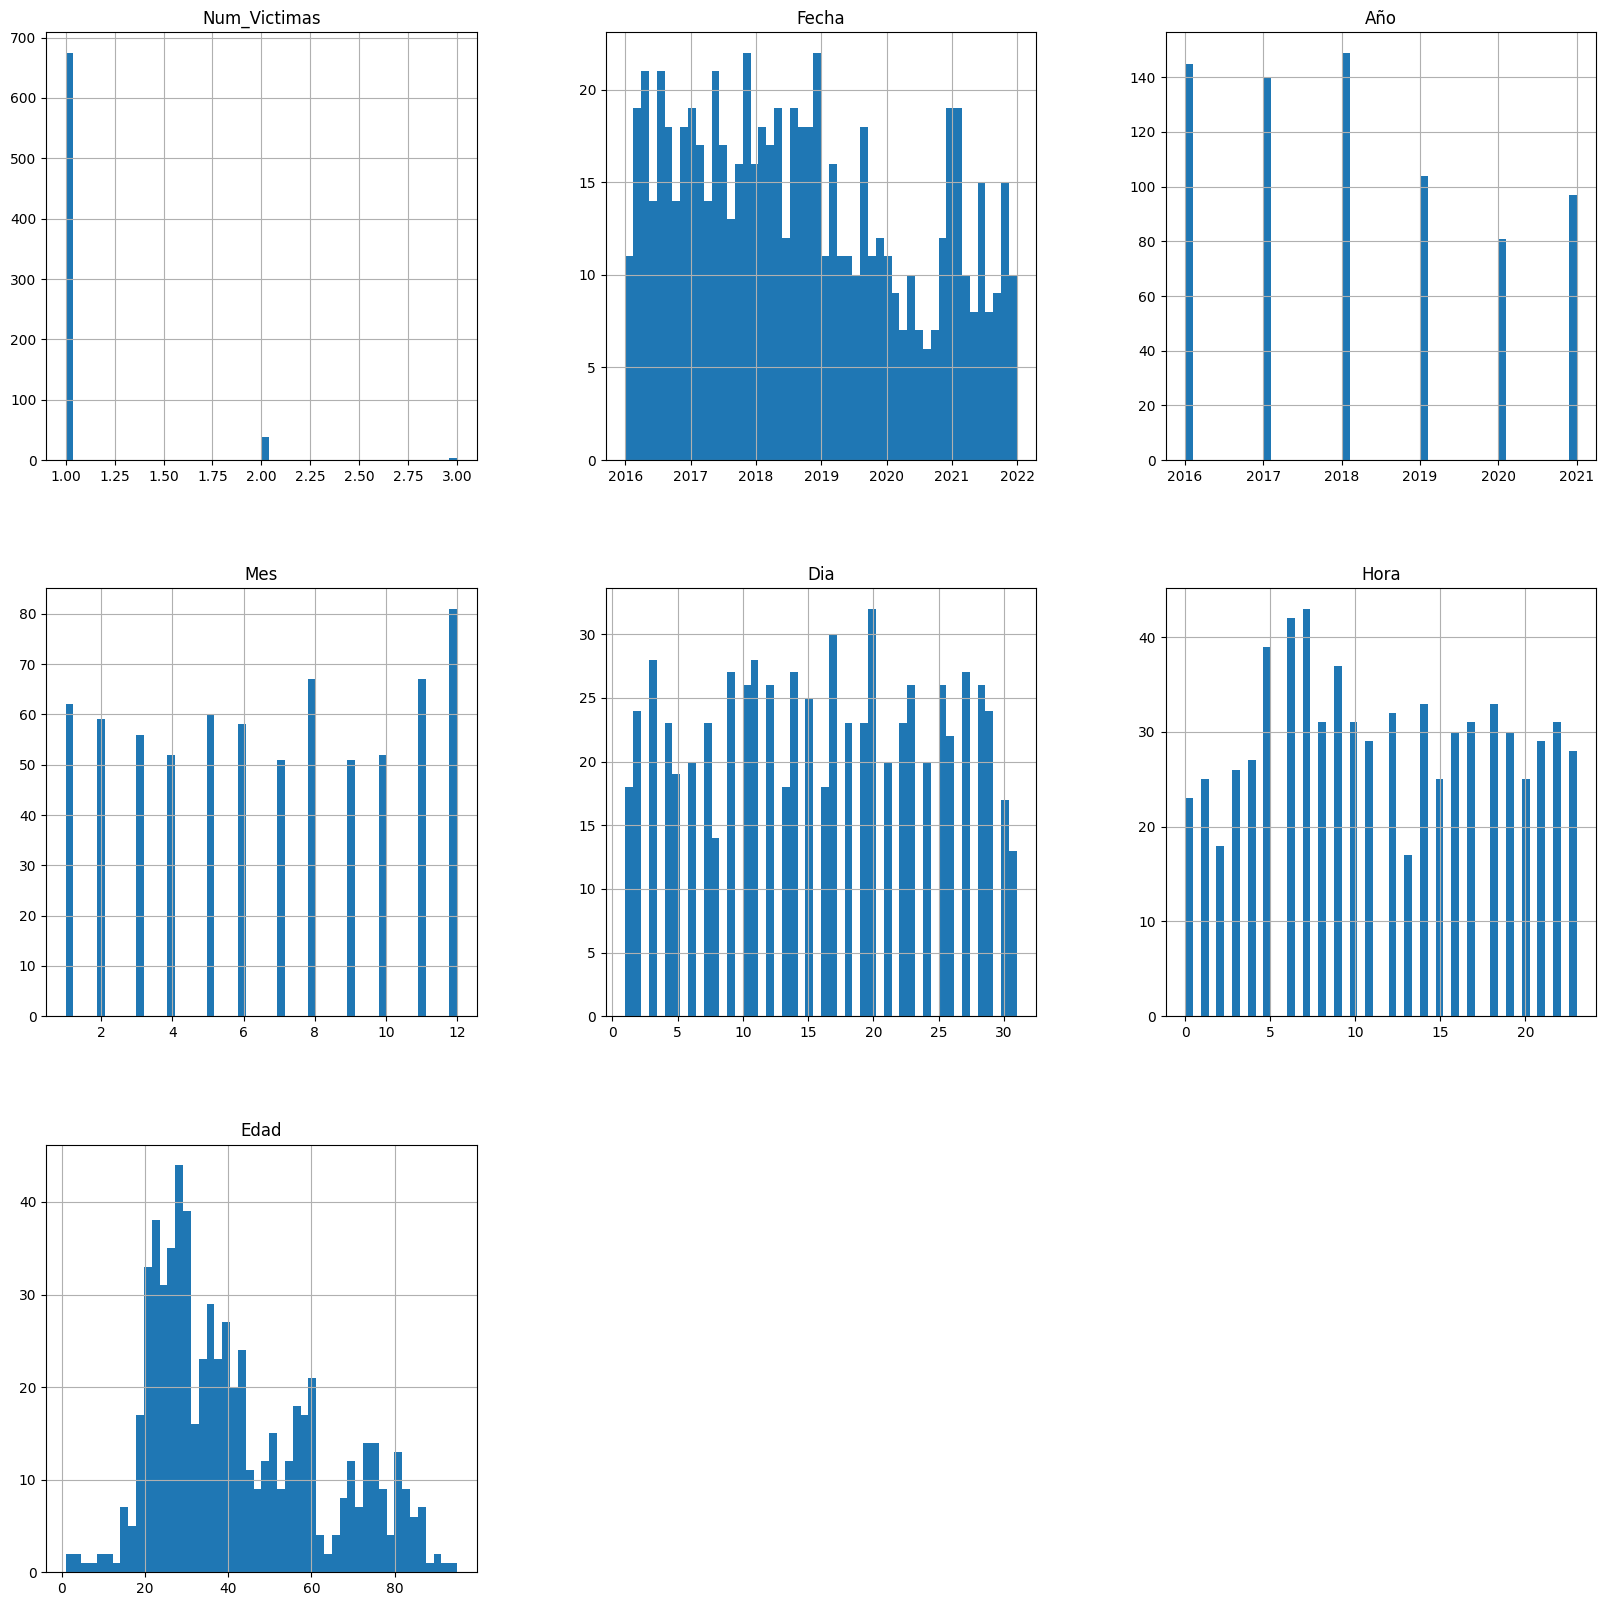

In [12]:
siniestros_data.hist(bins=50,figsize=(20,20))
plt.show


* Num_Victimas: En la mayoria de los casos cada accidente deja 1 sola victima, siendo en muy pocas ocasiones mas de una y nunca mas de tres.
* Fecha y Año : El mayor indice de siniestros esta registrado entre los años 2016 y finales de 2019, posteriormente se refleja una reduccion en el numero de accidentes presumiblemente debido al aislamiento que conllevo la pandemia del coronavirus entre el 2019 y 2021 (Se detalla mas adelante en un segundo grafico para mejor comprension)
* Mes: Hay un alza de accidentes a mediados y finales de cada año que concuerda con las temporadas de vacaciones
* Hora: Incremento de accidentes en las horas de desplazamiento a las actividades laborales y estudiantiles de la mañana.
* Edad: La mayoria de las victimas estan ubicadas dentro de edades productivas comprendidas entre 20 y 40 años.


Es necesario un analisis de las variables categoricas para tener un analisis general mas concluyente.

<h2>VARIABLES CATEGORICAS</h2>

In [13]:
siniestros_data.describe(include='category')

,Tipo_calle,Comuna,Victima,Acusado,Rol,Sexo,Rango_etario,Dia_nombre
count,716,716,716,716,716,716,664,716
unique,3,16,9,10,5,3,5,7
top,AVENIDA,1,MOTO,AUTO,CONDUCTOR,MASCULINO,Entre 21 y 40,Sabado
freq,511,93,302,210,330,545,327,110


In [373]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

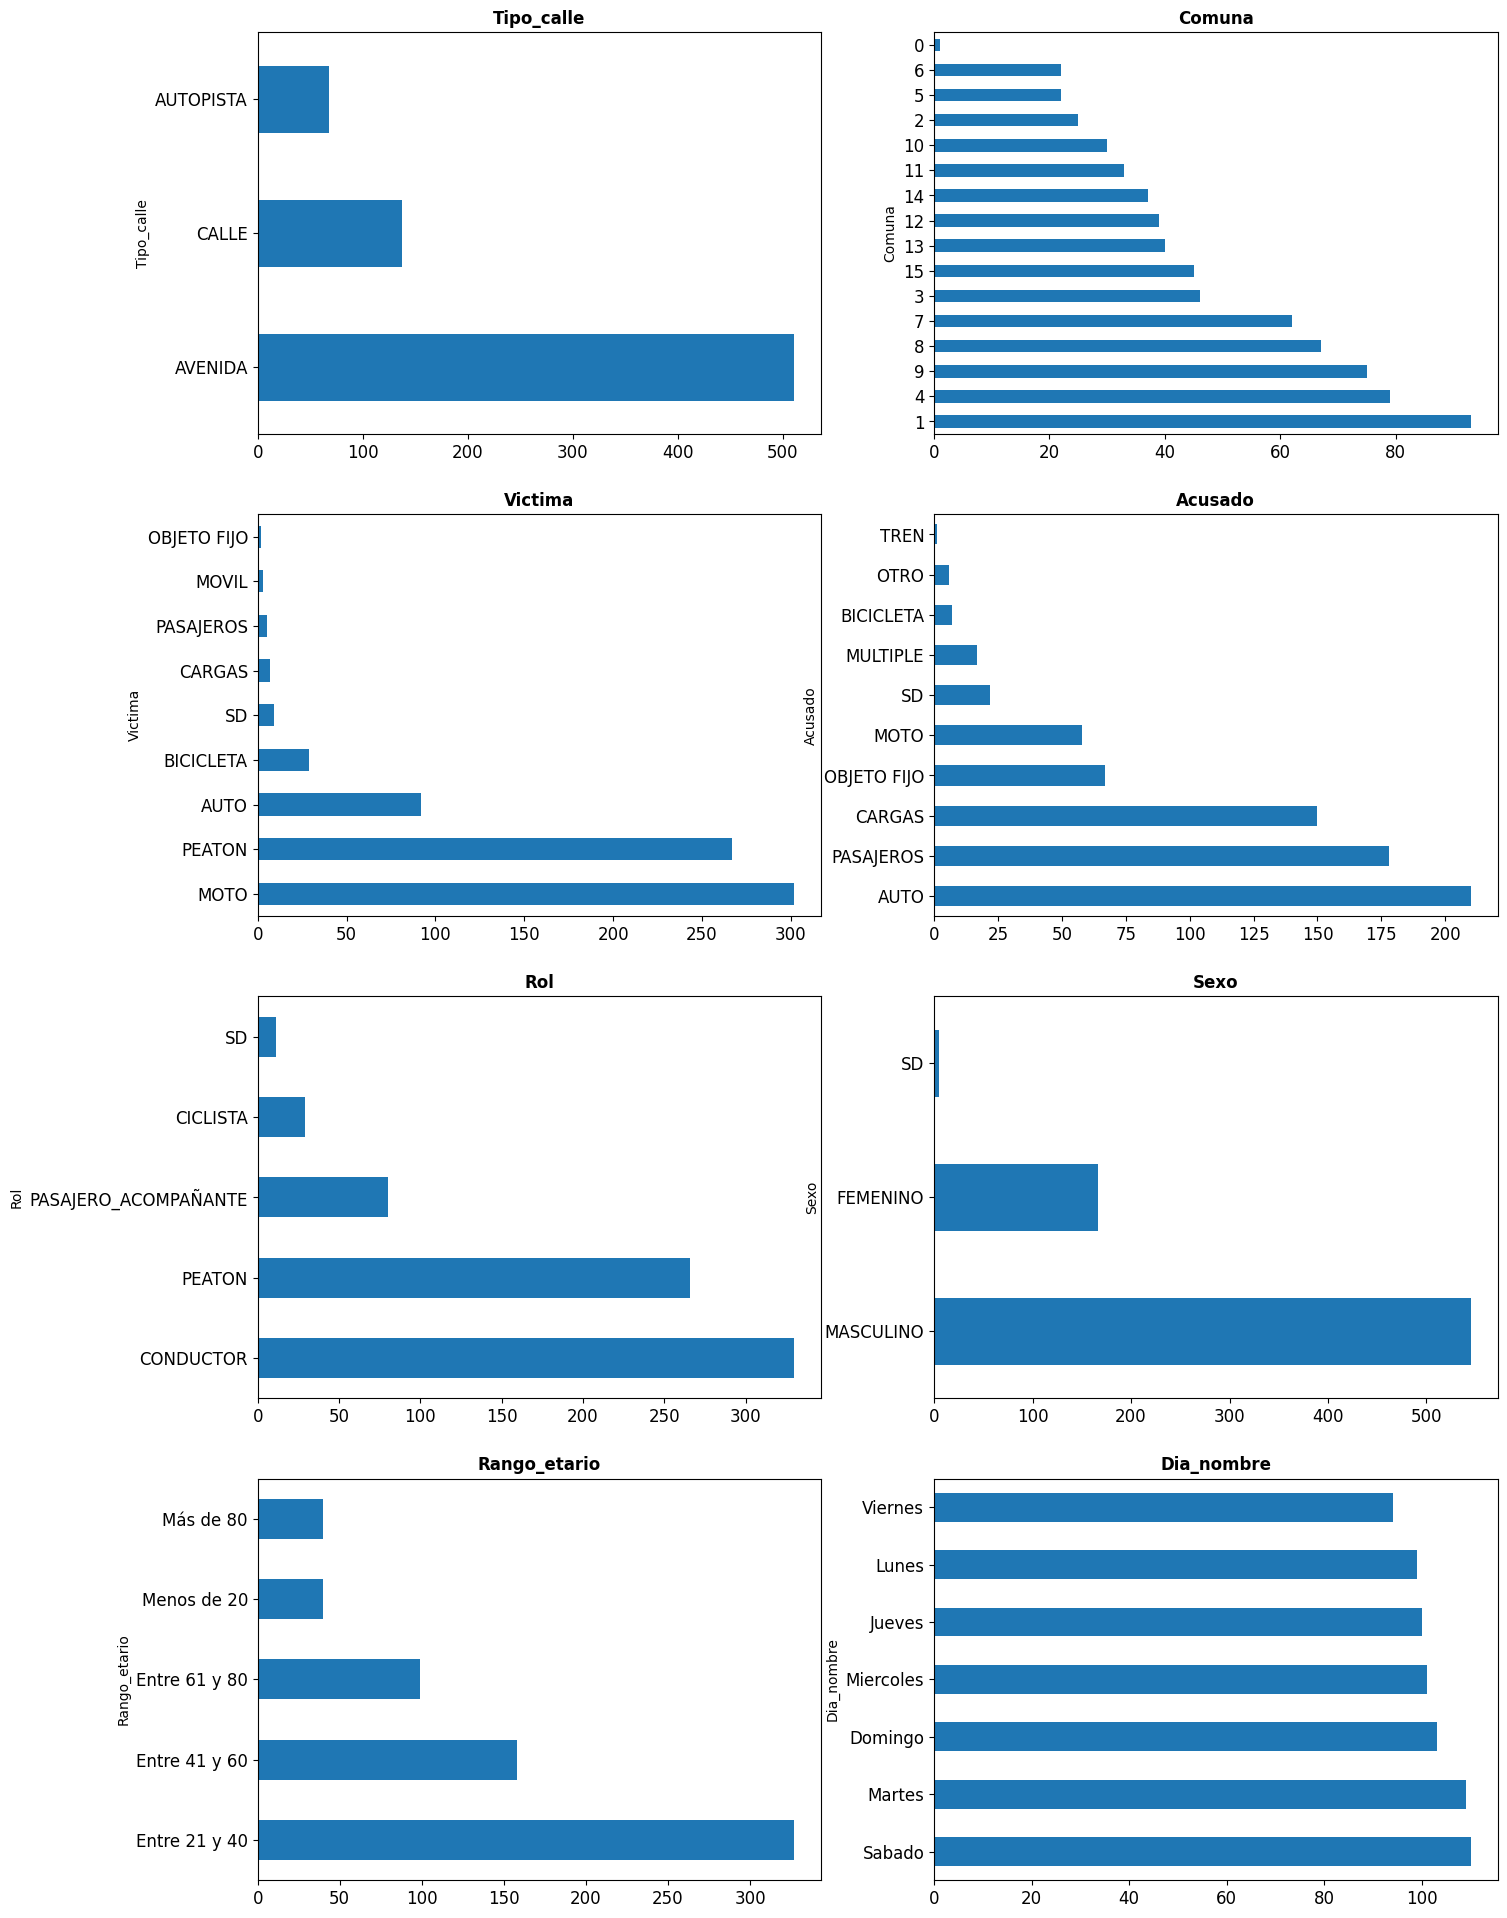

In [374]:
graficos_eda_categoricos(siniestros_data.select_dtypes('category'))

Es posible corroborar lo que ya demostraba la describcion de las variables categoricas, la existencia de un perfil en los accidentes

  * Tipo calle: Avenida; Debido posiblemente a que este es el tipo de via mas complejo de nuesto estudio con trafico en ambas direcciones
  * Comuna: Comuna '1'; Al ser una de las 3 comunas mas grandes de argentina y una de las 5 con mayor cantidad de habitantes es justificable la existencia de congestion vial y alto indice de accidentes.
  * Victima: Conductores de 'MOTO'
  * Acusado: Conductores de 'AUTO'
  * Rol: las victimas son 'CONDUCTOR'
  * Sexo: 'MASCULINO'
  * Rango etario de las victimas: 'Entre 21 y 40 años'
  * Nombre del dia: entre 'Martes' y 'Sabado'

Ademas la observacion de cada uno de los graficos evidencia la poca relevancia de la informacion sin datos "SD"

In [ ]:
# Imputaciones de datos debido a la poca relevancia de la etiqueta sin datos
siniestros_data = siniestros_data.assign(Comuna=siniestros_data['Comuna'].replace({0: 1}))
siniestros_data = siniestros_data.assign(Hora=siniestros_data['Hora'].replace({'SD': 6}))
siniestros_data = siniestros_data.assign(Hora_exacta=siniestros_data['Hora'].replace({0: 1}))
siniestros_data = siniestros_data.assign(Victima=siniestros_data['Victima'].replace({'SD': 'MOTO'}))
siniestros_data = siniestros_data.assign(Acusado=siniestros_data['Acusado'].replace({'SD': 'AUTO'}))
siniestros_data = siniestros_data.assign(Rol = siniestros_data['Rol'].replace({'SD': 'CONDUCTOR'}))
siniestros_data = siniestros_data.assign(Sexo = siniestros_data['Sexo'].replace({'SD': 'MASCULINO'}))

In [15]:
siniestros_data = siniestros_data.dropna()

In [377]:
siniestros_data.isna().sum()

Id                 0
Num_Victimas       0
Fecha              0
Año                0
Mes                0
Dia                0
Hora_Exacta        0
Hora               0
Lugar_del_hecho    0
Tipo_calle         0
Calle              0
Direccion          0
Comuna             0
pos x              0
pos y              0
Participantes      0
Victima            0
Acusado            0
Rol                0
Sexo               0
Edad               0
Rango_etario       0
Dia_nombre         0
Hora_exacta        0
dtype: int64

In [16]:
# Guardo el DataFrame como archivo CSV en la ruta especificada
siniestros_data.to_csv("Database/Data_dashboard.csv", index=False)

<h2>Victimas Anuales</h2>

In [17]:
# Agrupar por año y mes, y sumar el número de víctimas
Victimas_anuales = siniestros_data.groupby(["Año", "Mes"])["Num_Victimas"].sum().reset_index()
Victimas_anuales

,Año,Mes,Num_Victimas
0,2016,1,8
1,2016,2,12
2,2016,3,13
3,2016,4,7
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,4
70,2021,11,8


In [380]:
# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
Victimas_anuales["Año_mes"] = Victimas_anuales["Año"].astype(str) + "-" + Victimas_anuales["Mes"].astype(str)

# Convertir la variable de tiempo a formato datetime
Victimas_anuales["Año_mes"] = pd.to_datetime(Victimas_anuales["Año_mes"])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = Victimas_anuales.sort_values("Año_mes")

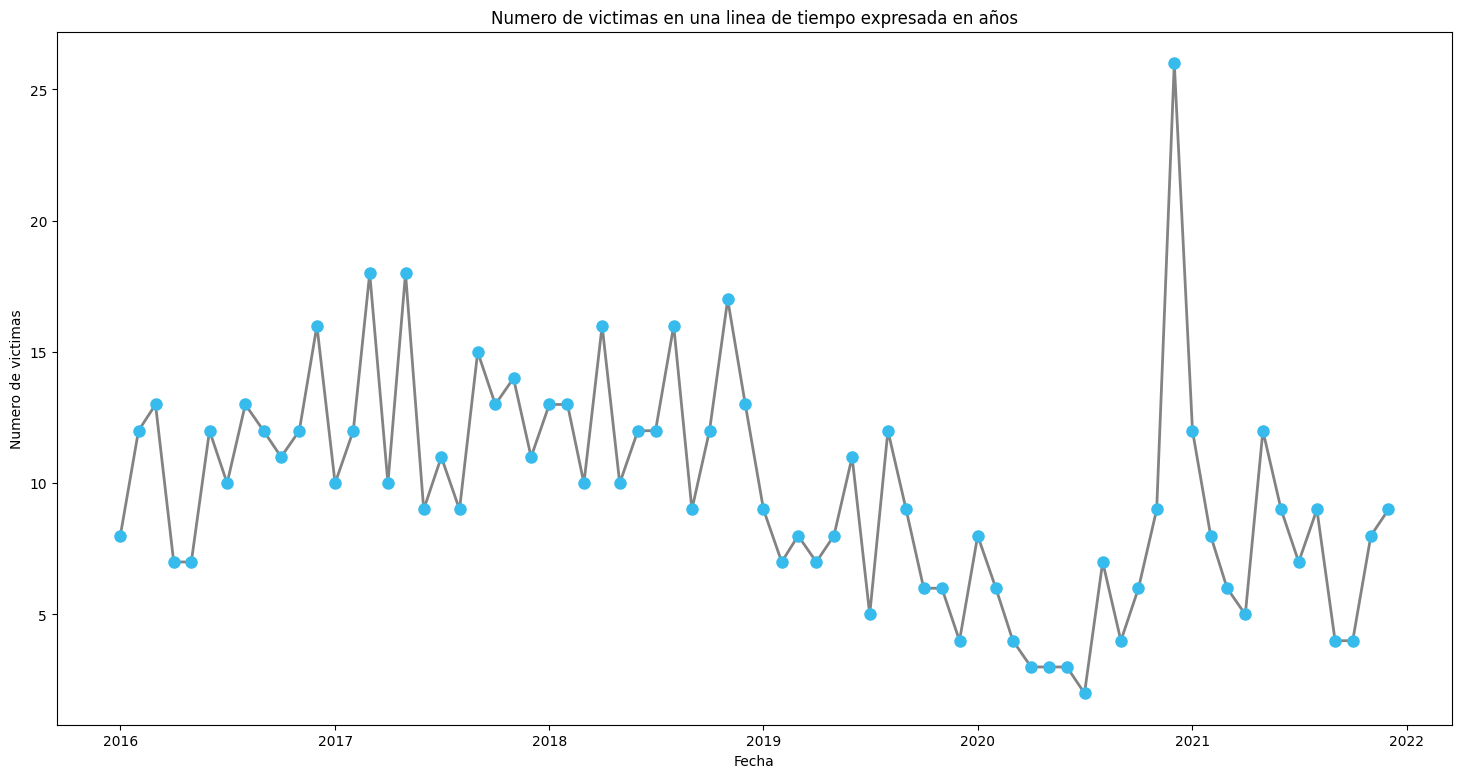

In [381]:
# Creacion de la figura
plt.figure(figsize=(18, 9))

# Trazamos la línea 
plt.plot(Victimas_anuales["Año_mes"], Victimas_anuales["Num_Victimas"], color='#838383', linewidth=2)  # Set line color and width
plt.title("Numero de victimas en una linea de tiempo expresada en años")
plt.xlabel("Fecha")
plt.ylabel("Numero de victimas")
# Colocamos los marcadores
plt.plot(Victimas_anuales["Año_mes"], Victimas_anuales["Num_Victimas"], marker='o', markersize=8, color='#37BBED', linestyle='none')  # Set marker color, size, and no line

Extendiendo la conclucion anterior es notable reduccion en el numero de accidentes debido al coronavirus entre el 2019 y 2021, el cual momentariamente tuvo un repunte que podemos asociar con la euforia provocada a la finalizacion del confinamiento, a pesar de esto ultimo, se regresa a un control quizas provocado por un rebrote de la enfermedad.

<h2>Distribucion de las victimas segun el genero</h2>

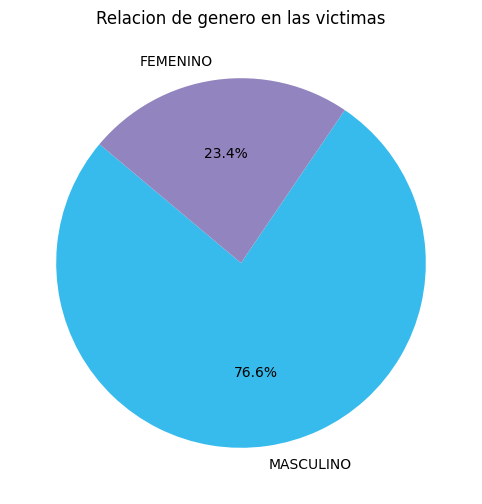

In [382]:
# Calcular la proporción de víctimas por sexo
proporcion = siniestros_data["Sexo"].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=["#37BBED","#9284BE"])
plt.title("Relacion de genero en las victimas")
plt.show()

El genero masculino suele ser mas arriesgado y presentar una conduccion mas agresiva 

<h2>Ubicacion del porcentaje de victimas segun edad</h2>

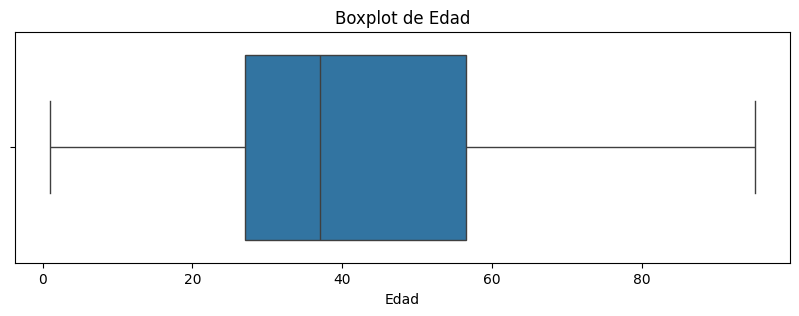

In [383]:
# Se crea el boxplot de la edad
plt.figure(figsize=(10, 3))
sns.boxplot(x=siniestros_data["Edad"])
plt.title("Boxplot de Edad")
plt.xlabel("Edad")
plt.show()

Segun lo mencionado anteriormente es evidente que el mayor porcentaje de las victimas se encuentra dentro de las edades productivas de la vida siendo estos peatones o conductores y ocurriendo la mayor parte de los siniestros en horas activas de la mañana.

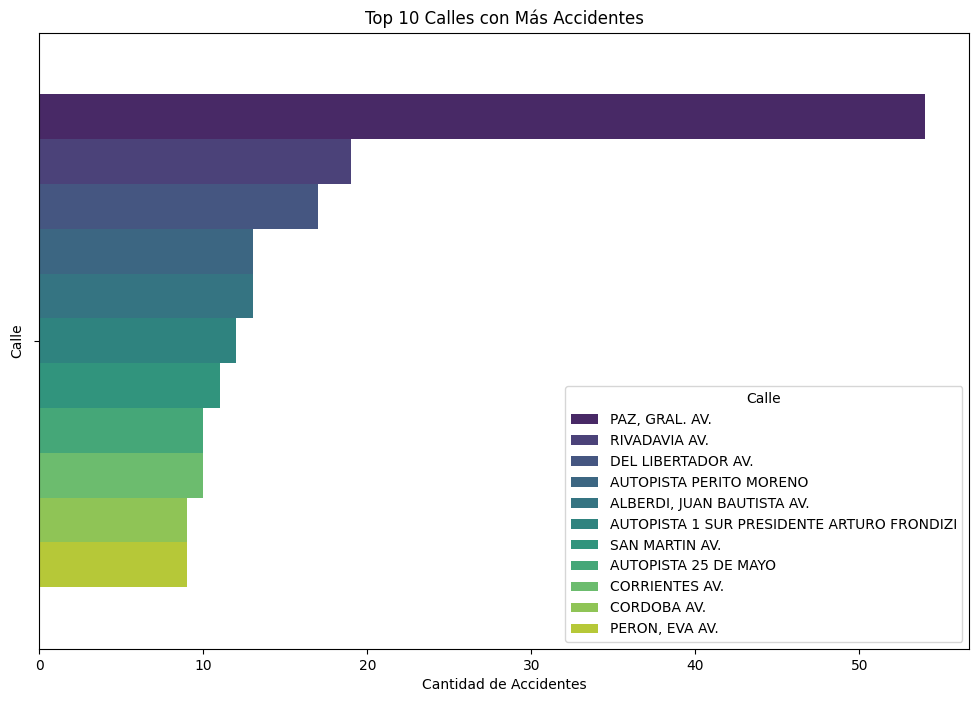

In [385]:
plt.figure(figsize=(12, 8))
top_calles = siniestros_data['Calle'].value_counts().head(11)  # Obtener los 10 calles con más accidentes + el valor 'No'
top_calles = top_calles[top_calles.index != 'No']  # Filtrar el valor 'No'
sns.barplot(x=top_calles.values, hue=top_calles.index, palette='viridis', legend=True)
plt.title('Top 10 Calles con Más Accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Calle')
plt.show()


La Av. Gral Paz tiene mas de 24Km de longitud y una velocidad constante de conduccion entre 80 y 100 Km/h, Ubicando la mayor cantidad de sinistros ocurridos en CABA.